In [25]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
import matplotlib.pyplot as pl
import astropy.units as U
import pandas as pd
import numpy as np
import sys
import os

sim_pipeline_path = '/mnt/zfsusers/hollowayp/sim-pipeline/'
paltas_path = '/mnt/zfsusers/hollowayp/paltas/'
sys.path.append(sim_pipeline_path)
sys.path.append(paltas_path)
os.chdir(sim_pipeline_path)
cosmo= FlatLambdaCDM(H0=70, Om0=0.3)
sky_area = Quantity(value=0.1, unit="deg2")
from slsim.Deflectors.elliptical_lens_galaxies import EllipticalLensGalaxies,vel_disp_from_m_star
from slsim.Pipelines.skypy_pipeline import SkyPyPipeline
from Load_LensPop_LSST_db import db_LensPop_LSST
from slsim.lens_pop import LensPop
import arviz as az
az.style.use("arviz-doc")

In [19]:
print('Importing Data')
Grillo_2008 = pd.read_csv('/mnt/zfsusers/hollowayp/paltas/Project_2_Data/Grillo_2008_Table_1&4.tsv',delimiter=';',skiprows=119,
names=['SLACS','zl','zs','thetaE','thetae','SDSS','Sloan','Simbad',
    'MSalBC (10_10M_sol)','E_MSalBC (10_10M_sol)','e_MSalBC (10_10M_sol)',
    'MSalM (10_10M_sol)','E_MSalM (10_10M_sol)','e_MSalM (10_10M_sol)',
    'MChaBC (10_10M_sol)','E_MChaBC (10_10M_sol)','e_MChaBC (10_10M_sol)',
    'MKroM (10_10M_sol)','E_MKroM (10_10M_sol)','e_MKroM (10_10M_sol)','fap',
    'MSalBC_Rein (10_10M_sol)','E_MSalBC_Rein (10_10M_sol)','e_MSalBC_Rein (10_10M_sol)',
    'MSalM_Rein (10_10M_sol)','E_MSalM2 (10_10M_sol)','e_MSalM_Rein (10_10M_sol)',
    'MChaBC_Rein (10_10M_sol)','E_MChaBC_Rein (10_10M_sol)','e_MChaBC_Rein',
    'MKroM_Rein (10_10M_sol)','E_MKroM_Rein (10_10M_sol)','e_MKroM_Rein (10_10M_sol)',
    'Mtotlen (10_10M_sol)','e_Mtotlen (10_10M_sol)',
    '_RA','_DE'])
Bolton_2008 = pd.read_csv('/mnt/zfsusers/hollowayp/paltas/Project_2_Data/Bolton_2008_SLACS_V_Table_4.tsv',delimiter=';',skiprows=79,
names=['SDSS','zFG','zBG','Imag','n_Imag','Name','L(V555)','Re','b/a','sigma','e_sigma','Mph','Mul','Lens','n_Lens','Sloan','_RA','_DE'])

'''
Important notes about this sample:
1) There are many different options for stellar mass, depending on which IMF etc is chosen.
2) Some systems don't have available velocity dispersions.
3) These are only the high-grade SLACS systems (~50 of them)
4) The velocity dispersions have NOT been aperture corrected.
'''
SLACS_A_Grade_db = pd.merge(Grillo_2008,Bolton_2008,left_on='SLACS',right_on='Name')
SLACS_A_Grade_db=SLACS_A_Grade_db
SLACS_A_Grade_db.replace(' ', '',inplace=True,regex=True)
SLACS_A_Grade_db.replace('', np.nan,inplace=True,regex=True)

SLACS_A_Grade_db[['Name','zl','zFG','zs','zBG','sigma','Re','MSalM (10_10M_sol)','MSalBC (10_10M_sol)']]

#Importing SL2S Sample (see /mnt/zfsusers/hollowayp/paltas/Project_2_Data/SL2S_SLACS_Lens_Properties_Notebook.ipynb)
SL2S_db = pd.read_csv('/mnt/zfsusers/hollowayp/paltas/Project_2_Data/Sonnenfeld_2013_SL2S_III_and_IV.csv')

#Importing Bezanson (2015) data:
bz_2015 = pd.read_csv(f'{paltas_path}//Bezanson_2015_Table_1.tsv',skiprows=75,header=None,delimiter=';',
                    names=['ID','RAJ2000','DEJ2000','z','Re','n','Filter','logM','sig.A','e_sig.A','sig.Re','e_sig.Re','tExp','HCat','Sloan','SimbadName'])


Importing Data


In [26]:
pipeline = SkyPyPipeline(
                skypy_config=sim_pipeline_path+'/data/SkyPy/lsst-like.yml',
                sky_area=sky_area,
                filters=None,
                cosmo=cosmo)

In [23]:
from importlib import reload  # Python 3.4+
reload(sys.modules['slsim'])
reload(sys.modules['slsim.Deflectors'])
reload(sys.modules['slsim.Deflectors.elliptical_lens_galaxies'])
reload(sys.modules['slsim.Deflectors.velocity_dispersion'])
reload(sys.modules['slsim.lens_pop'])
#reload(sys.modules['slsim.image_simulation'])
#reload(sys.modules['slsim.Plots.lens_plots'])
#reload(sys.modules['slsim.lens_pop'])
from slsim.Deflectors.elliptical_lens_galaxies import EllipticalLensGalaxies
from slsim.lens_pop import LensPop
#from slsim.Plots.lens_plots import LensingPlots
from slsim.Deflectors.velocity_dispersion import *


CWD /mnt/zfsusers/hollowayp/sim-pipeline
PATH ['/mnt/zfsusers/hollowayp/sim-pipeline/notebooks', '/usr/local/shared/python/3.11.4/lib/python311.zip', '/usr/local/shared/python/3.11.4/lib/python3.11', '/usr/local/shared/python/3.11.4/lib/python3.11/lib-dynload', '', '/mnt/users/hollowayp/python11_env/lib/python3.11/site-packages', '/mnt/zfsusers/hollowayp/sim-pipeline/', '/mnt/zfsusers/hollowayp/paltas/', '/mnt/zfsusers/hollowayp/sim-pipeline/', '/mnt/zfsusers/hollowayp/paltas/', '/mnt/zfsusers/hollowayp/sim-pipeline/', '/mnt/zfsusers/hollowayp/paltas/', '/mnt/zfsusers/hollowayp/sim-pipeline/', '/mnt/zfsusers/hollowayp/paltas/']


VAL 75936 75936


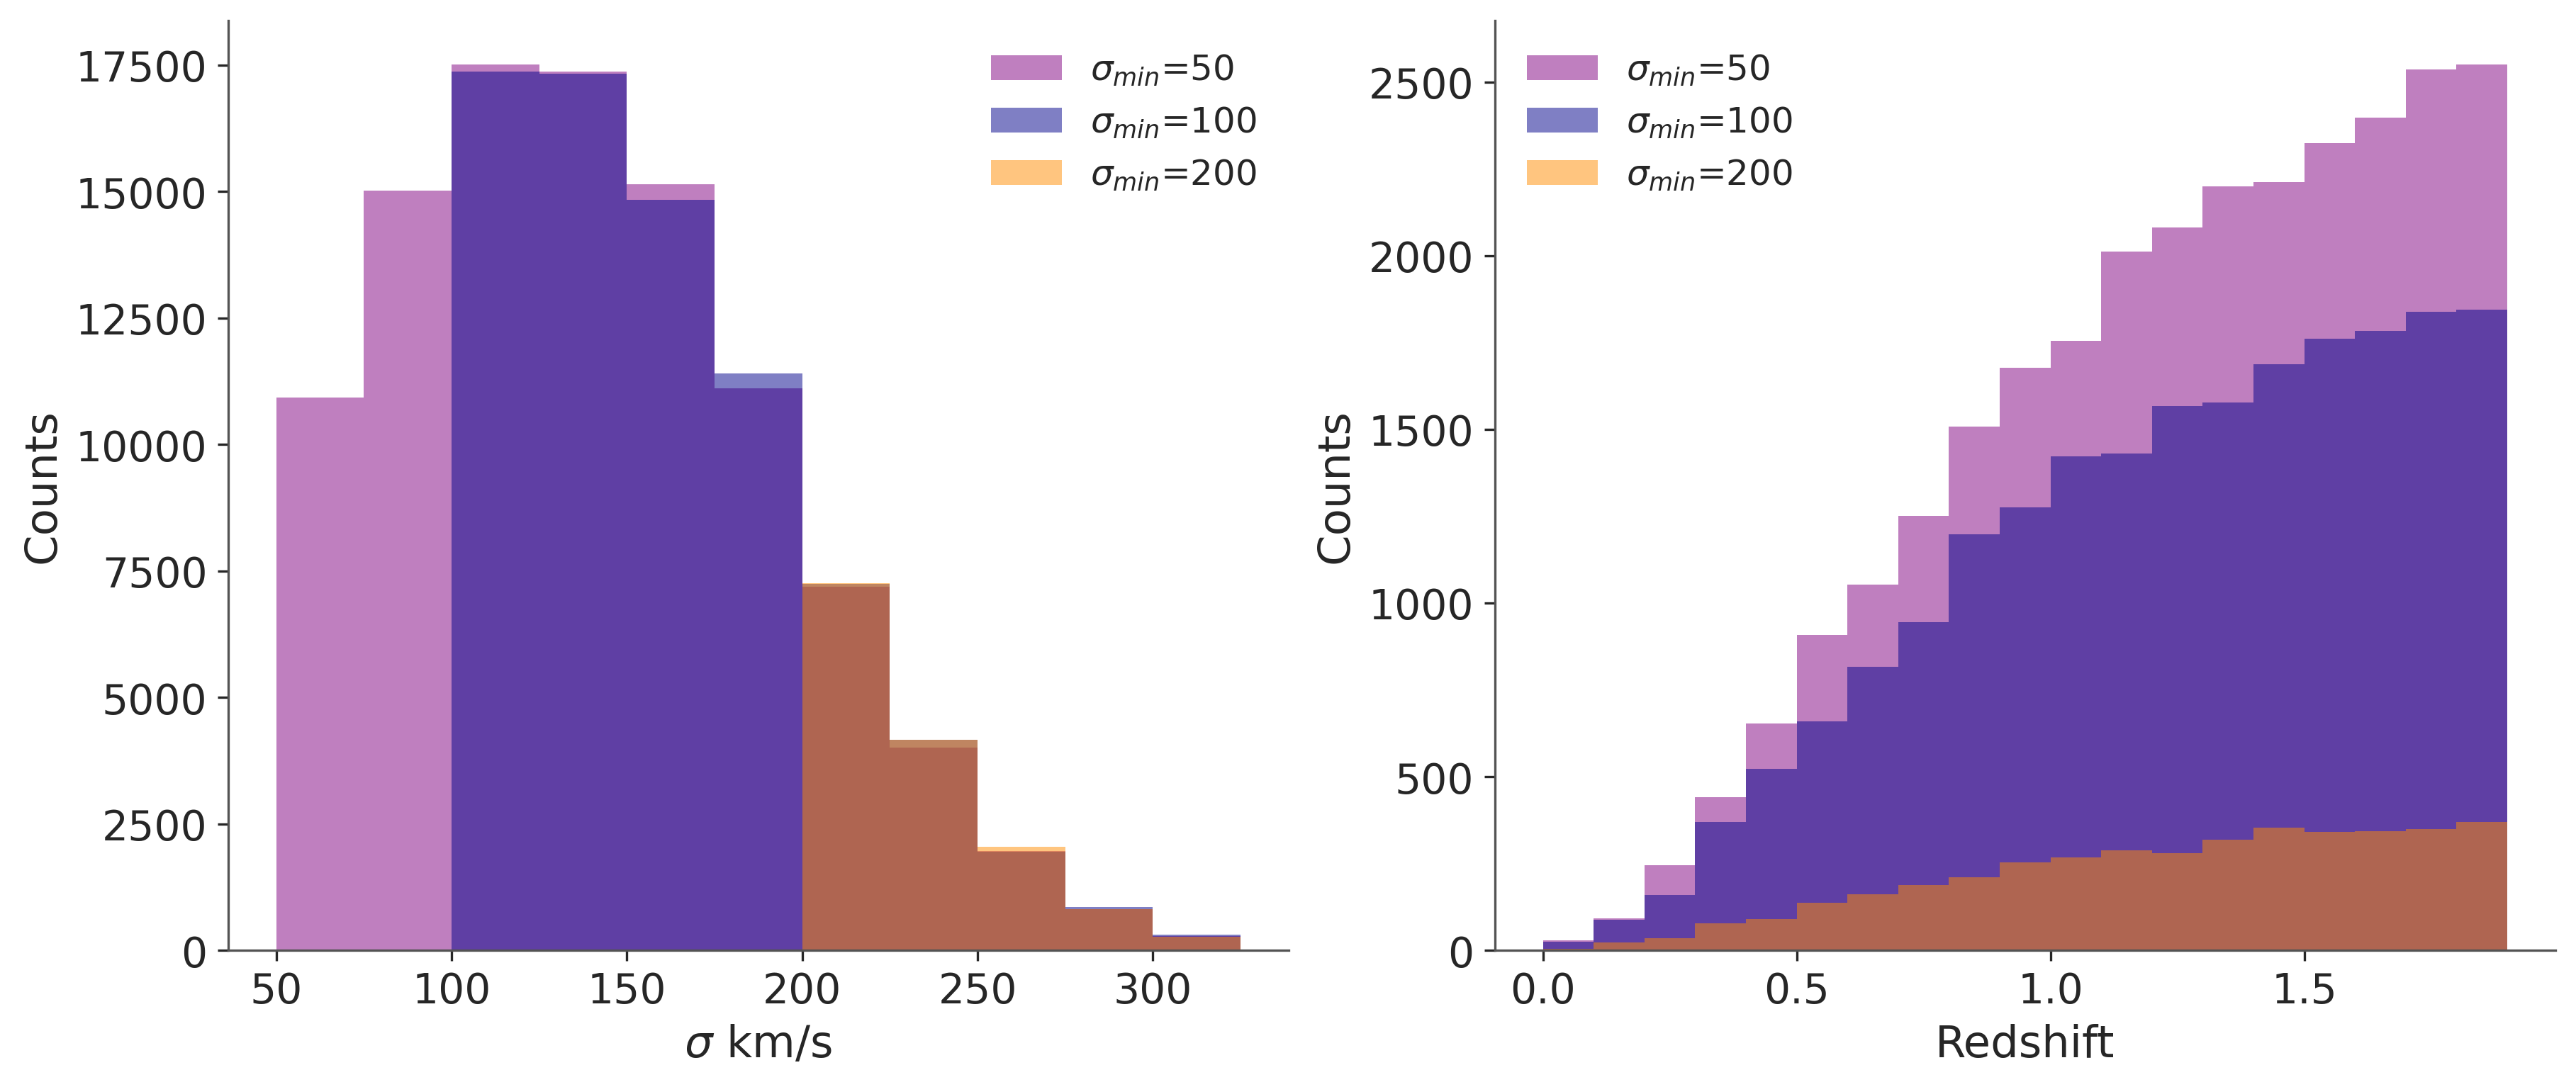

Getting 5448 galaxies from the LMF, but 75936 corresponding velocity dispersions, with ratio 0.07174462705436156, over 0.1 deg2, with vd_min=100
14839 have $\sigma$>200
Cropping velocity dispersion list
hellooo23


In [27]:
kwargs_lens_cuts = {"mag_arc_limit": {"i": 25}, "min_magnification": 3}
#
kwargs_deflector_cut = {"band": "i", "band_max": 23, "z_min": 0.01, "z_max": 1.26}
#
kwargs_source_cut = {"band": "i", "band_max": 28.4, "z_min": 0.1, "z_max": 4.6}

lens_galaxies = EllipticalLensGalaxies(
                pipeline.red_galaxies,
                kwargs_cut= kwargs_deflector_cut,
                kwargs_mass2light=None,
                cosmo = cosmo,
                sky_area=sky_area)

In [28]:
# run skypy pipeline and make galaxy-galaxy population class using GalaxyGalaxyLensPop
print('Making LensPop')
gg_lens_pop = LensPop(
    deflector_type="elliptical",
    source_type="galaxies",
    kwargs_deflector_cut=kwargs_deflector_cut,
    kwargs_source_cut=kwargs_source_cut,
    kwargs_mass2light=None,
    skypy_config=sim_pipeline_path+'/data/SkyPy/lsst-like.yml',
    sky_area=sky_area,
    cosmo=cosmo,
    pipeline_table=lens_galaxies
)
print('Drawing Population')
gg_lens_population = gg_lens_pop.draw_population(kwargs_lens_cuts=kwargs_lens_cuts)

Making LensPop
Using inputted skypy table
Drawing Population
Drawing Lens Systems


100%|██████████| 700/700 [01:07<00:00, 10.30it/s]


In [164]:
#Lenspop SNR Calculation from https://github.com/tcollett/LensPop/blob/master/SignaltoNoise.py
def SNfunc(data,sig,significancefloor=0.5):
        D=data.ravel()
        S=sig.ravel()

        args=np.argsort(-D/S)
        D=np.take(D,args)
        S=np.take(S,args)
        Dsum=np.cumsum(D)
        Ssum=np.cumsum(S**2)**0.5
        SN=(Dsum/Ssum).max()

        #regional SN
        import scipy.ndimage as  ndimage
        data[data/sig<significancefloor]=0
        masks, multiplicity = ndimage.measurements.label(data)
        labels=np.arange(1, multiplicity+1)
        SNs=np.zeros(multiplicity+1)
        SNs[0]=SN
        for i in range(multiplicity):
            D=data[masks==i+1].ravel()
            S=sig[masks==i+1].ravel()
            args=np.argsort(-D/S)
            D=np.take(D,args)
            S=np.take(S,args)
            Dsum=np.cumsum(D)
            Ssum=np.cumsum(S**2)**0.5
            SNi=(Dsum/Ssum).max()
            SNs[i+1]=SNi
        SNs=-np.sort(-SNs)
        return SNs

/tmp/ipykernel_5544/3033025276.py:15: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  masks, multiplicity = ndimage.measurements.label(data)


array([86.9943102, 86.9943102,  4.73139  ])

In [174]:
from tqdm import tqdm
LensPop_pass_bool = np.ones(len(gg_lens_population)).astype('bool')
PSF_FWHM = 0.9 #arcsec, median FWHM for coadds
for i in tqdm(range(len(gg_lens_population))):
    #Pass tE test:
    if ((3600*180/np.pi)*(gg_lens_population[i]).source.angular_size)**2+(PSF_FWHM/2)**2>\
        (gg_lens_population[i].einstein_radius)**2:
            LensPop_pass_bool[i]==False
    #Pass mu*rE>seeing
    if gg_lens_population[i].extended_source_magnification()*\
       ((3600*180/np.pi)*(gg_lens_population[i]).source.angular_size)<PSF_FWHM:
            LensPop_pass_bool[i]==False
    #Pass x^2+y^2<tE^2:
    if np.sum(gg_lens_population[i].source_position**2)>(gg_lens_population[i].einstein_radius)**2:
            LensPop_pass_bool[i]==False
    #Pass SNR>20
    im,no = LensingPlots().return_image_and_noise(gg_lens_population[i],band='i')
    SN_i = SNfunc(im-no,no)
    if max(SN_i)<20:
        LensPop_pass_bool[i]==False

LensPop_pass_bool.all()

  0%|          | 0/461 [00:00<?, ?it/s]/tmp/ipykernel_5544/3033025276.py:15: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  masks, multiplicity = ndimage.measurements.label(data)
100%|██████████| 461/461 [00:29<00:00, 15.61it/s]


True

/tmp/ipykernel_26869/2422868510.py:24: UserWarning: The figure layout has changed to tight
  pl.tight_layout()


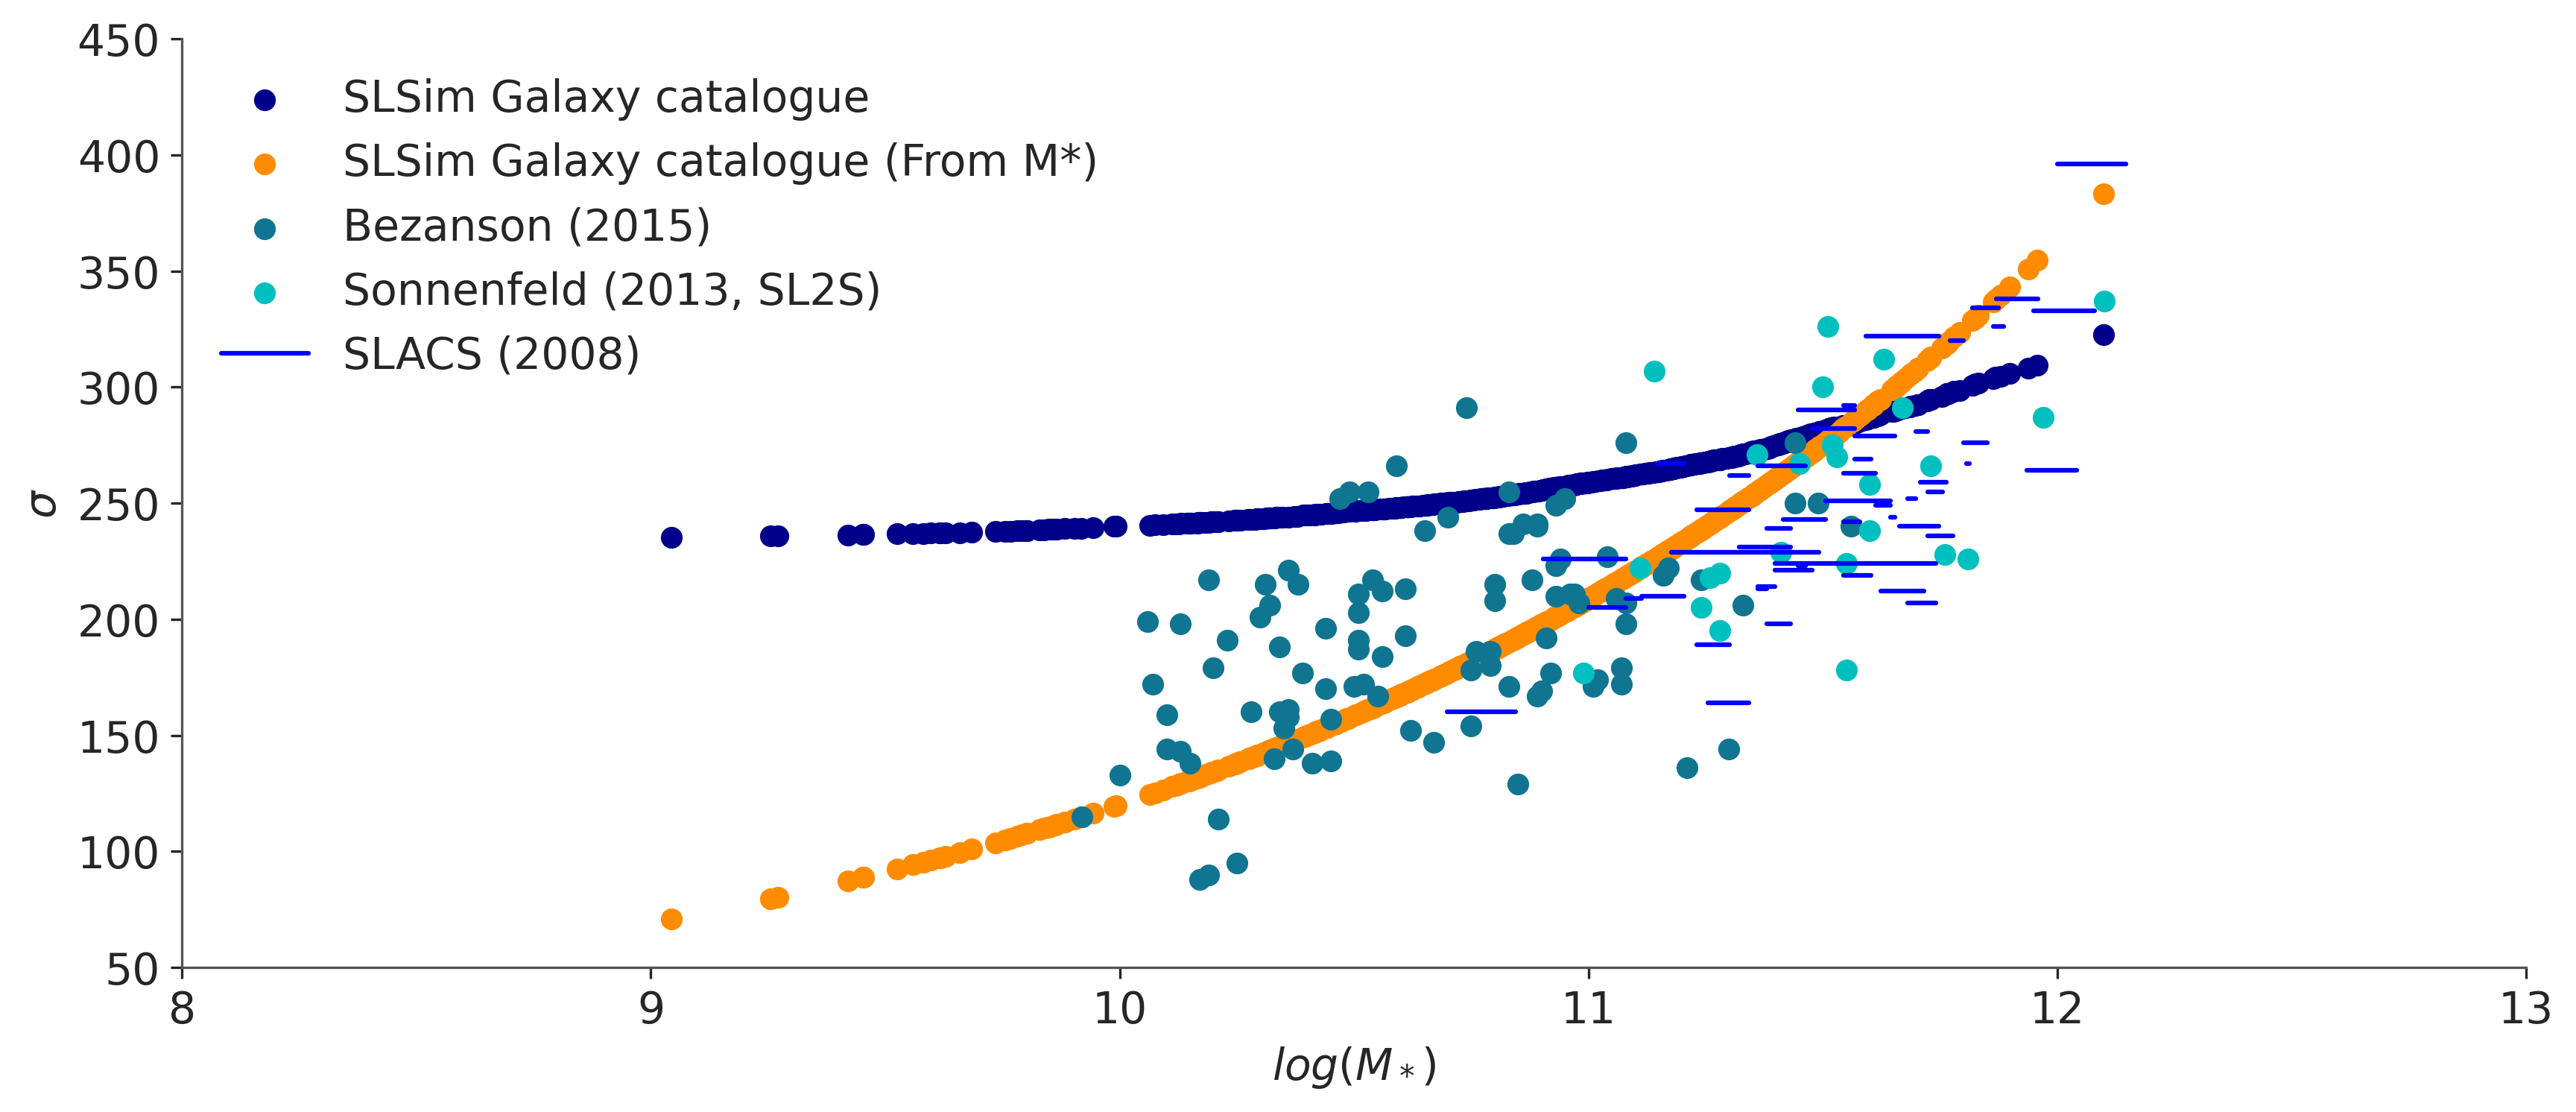

SLACS lines show difference in stellar populations for M* fit


In [29]:
slsim_vel_disp = lens_galaxies._galaxy_select['vel_disp']
slsim_mstar = lens_galaxies._galaxy_select['stellar_mass']

pl.scatter(np.log10(np.array([slsim_mstar[elem] for elem in range(len(slsim_mstar))])),
                             [slsim_vel_disp[elem] for elem in range(len(slsim_vel_disp))],
          label='SLSim Galaxy catalogue',c='darkblue')
pl.scatter(np.log10(np.array([slsim_mstar[elem] for elem in range(len(slsim_mstar))])),
           vel_disp_from_m_star(slsim_mstar),
          label='SLSim Galaxy catalogue (From M*)',c='darkorange')
pl.scatter(bz_2015['logM'],bz_2015['sig.Re'],label = 'Bezanson (2015)')
pl.scatter(SL2S_db['M*'],SL2S_db['O_e2'],label = 'Sonnenfeld (2013, SL2S)')
for s_i in range(len(SLACS_A_Grade_db)):
    if s_i==0: label_i = 'SLACS (2008)'
    else: label_i='_nolegend_'
    pl.plot([np.log10(10**10*(SLACS_A_Grade_db['MSalM (10_10M_sol)']))[s_i],
             np.log10(10**10*(SLACS_A_Grade_db['MSalBC (10_10M_sol)']))[s_i]],
            [SLACS_A_Grade_db['sigma'].astype('float64')[s_i],
             SLACS_A_Grade_db['sigma'].astype('float64')[s_i]],
            c='blue',label = label_i)

pl.xlabel('$log(M_*)$')
pl.ylabel('$\sigma$')
pl.legend()
pl.tight_layout()
pl.xlim(8,13)
pl.ylim(50,450)
#pl.title('$\sigma_{min}$=200')
pl.show()
print('SLACS lines show difference in stellar populations for M* fit')


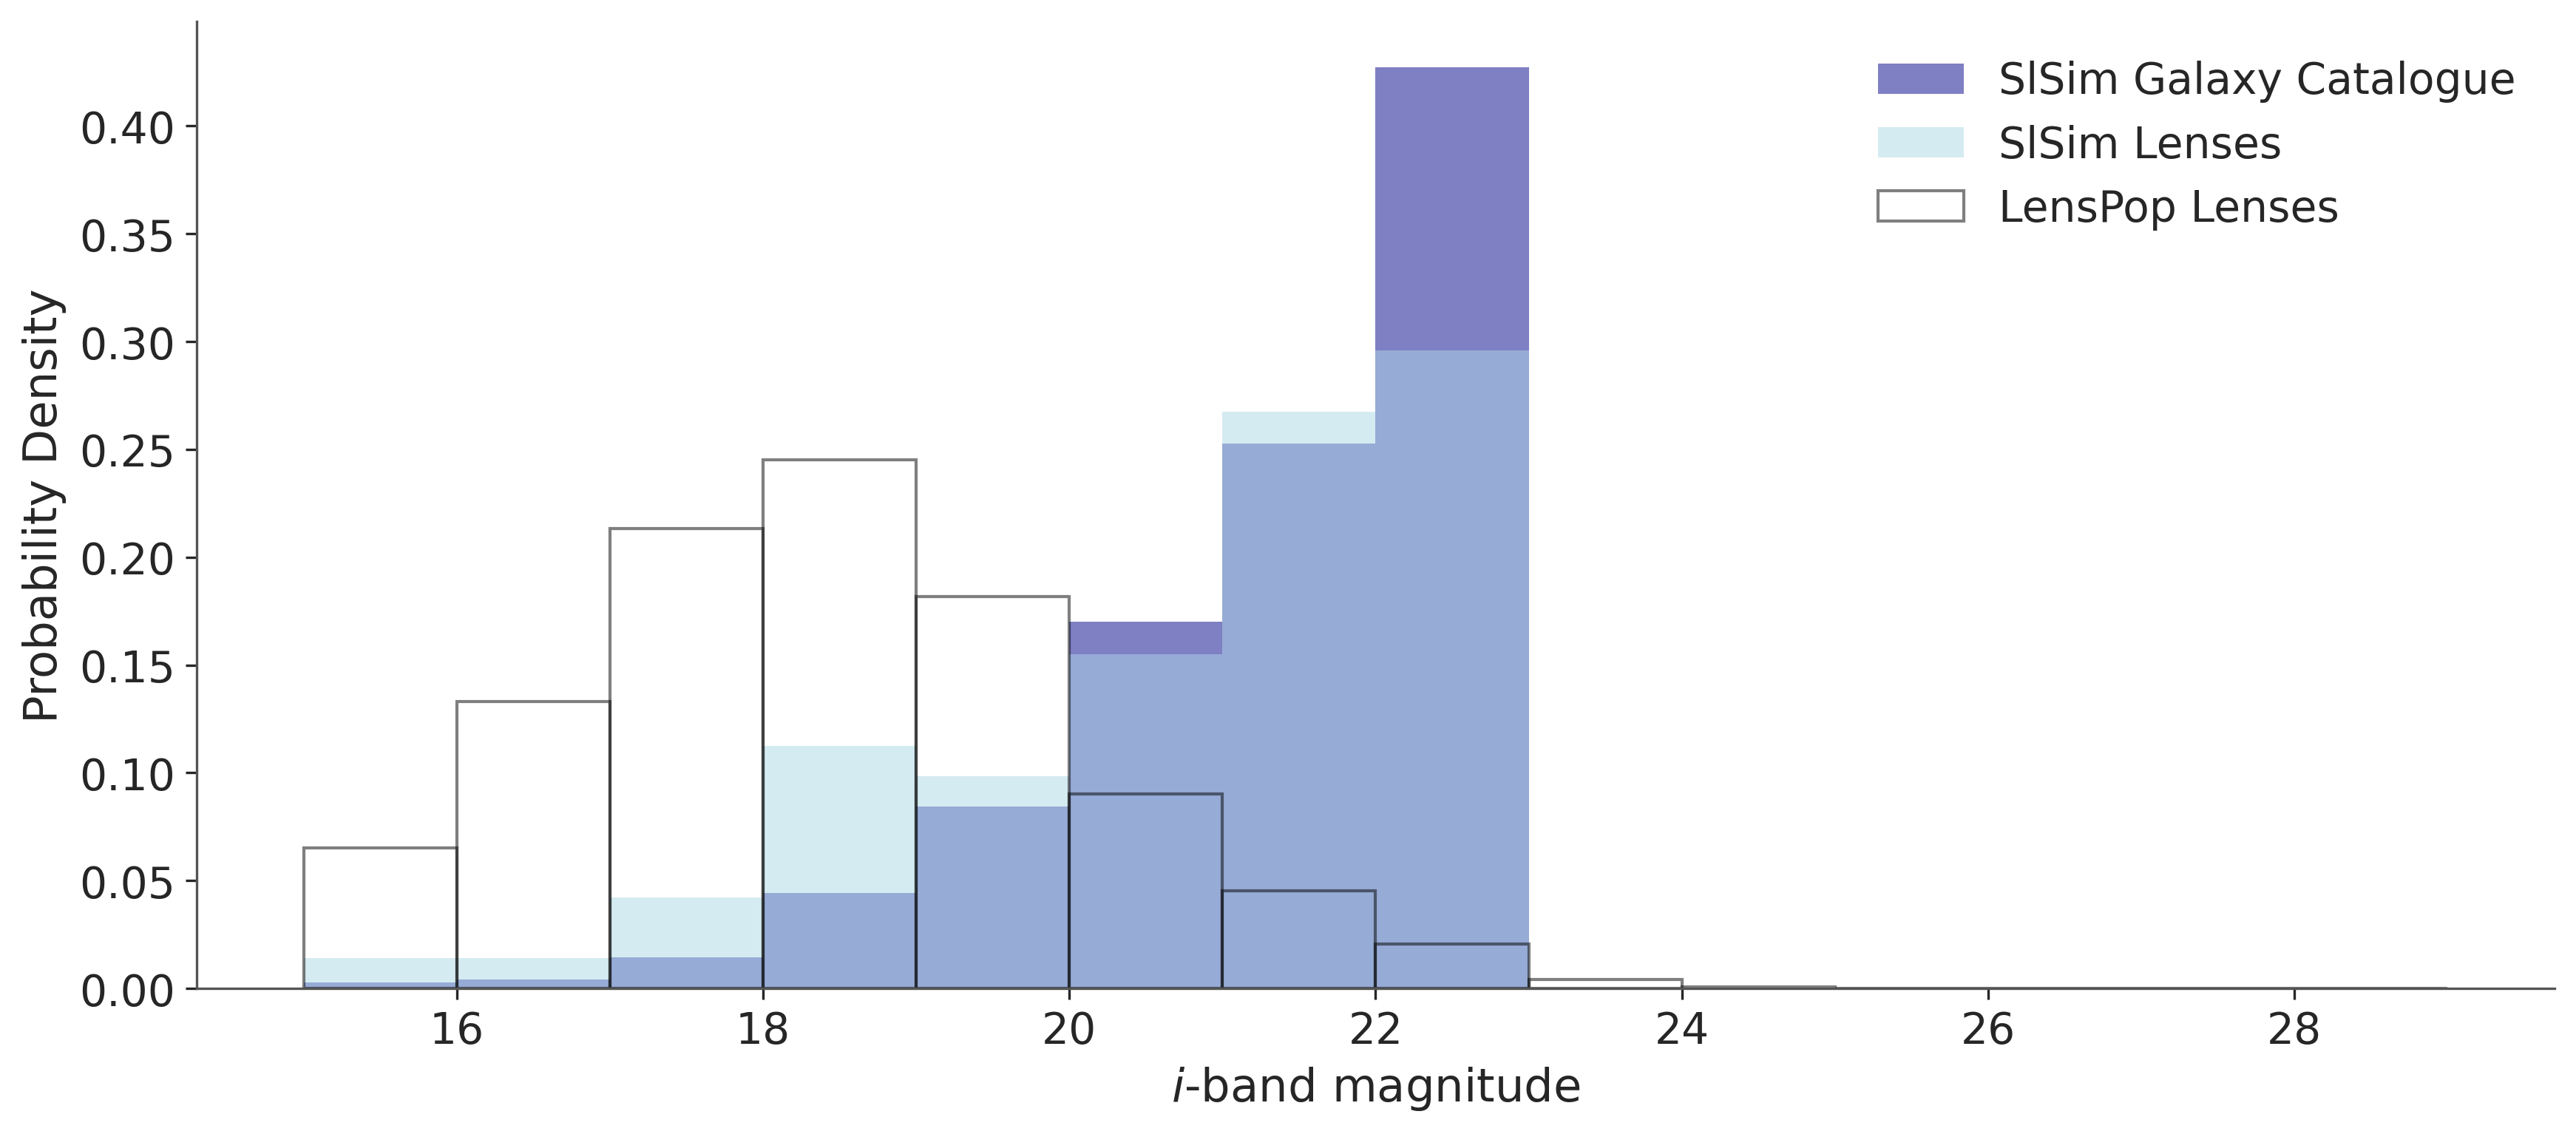

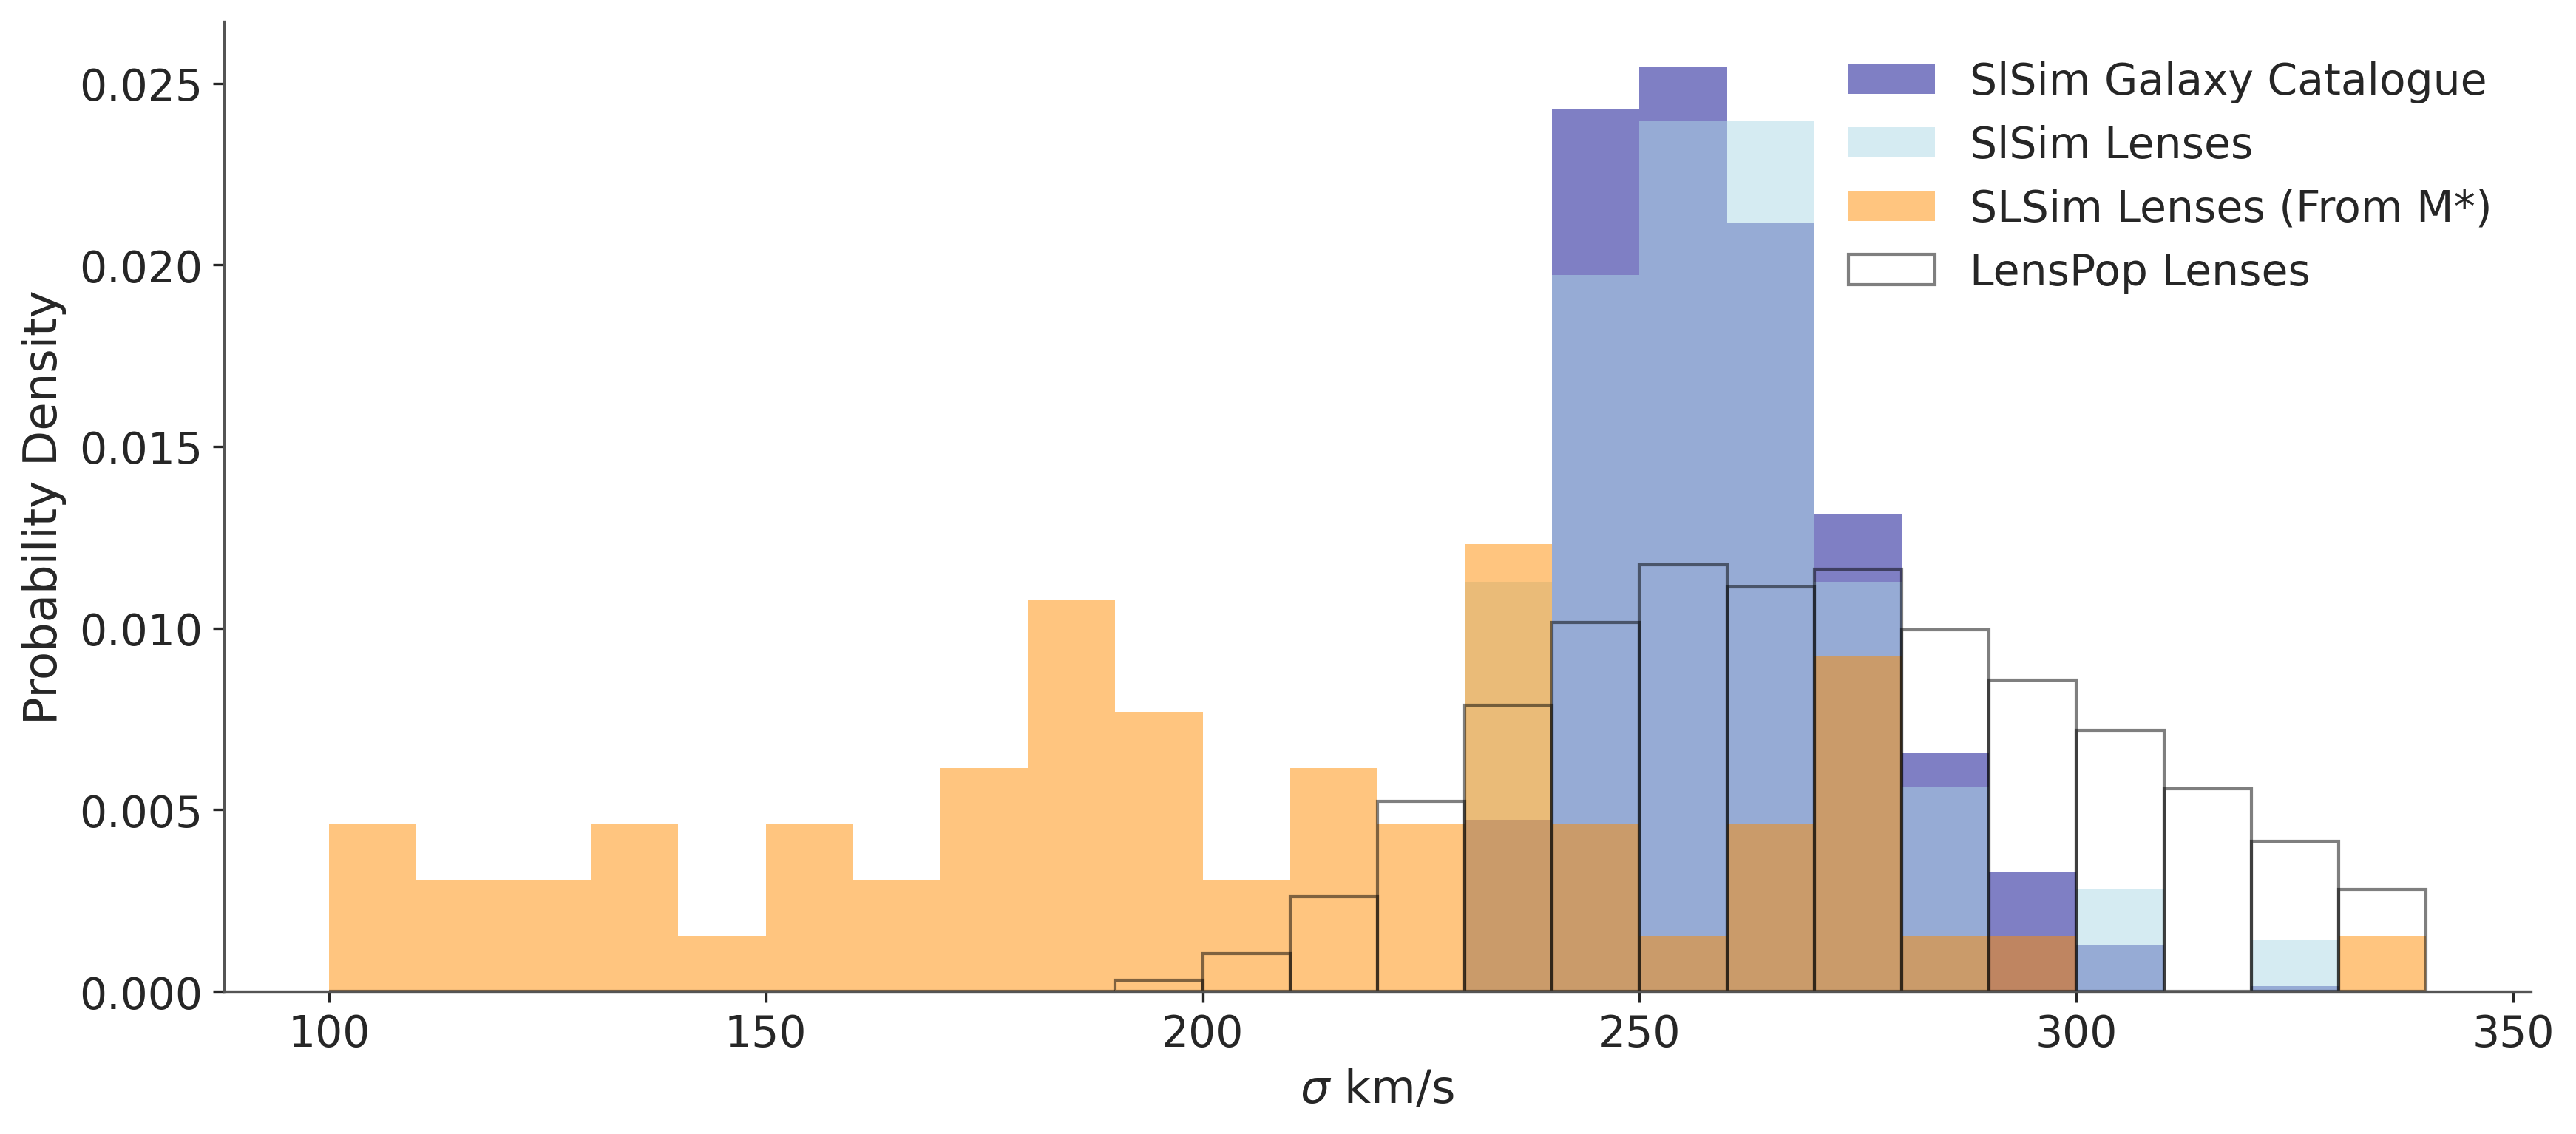

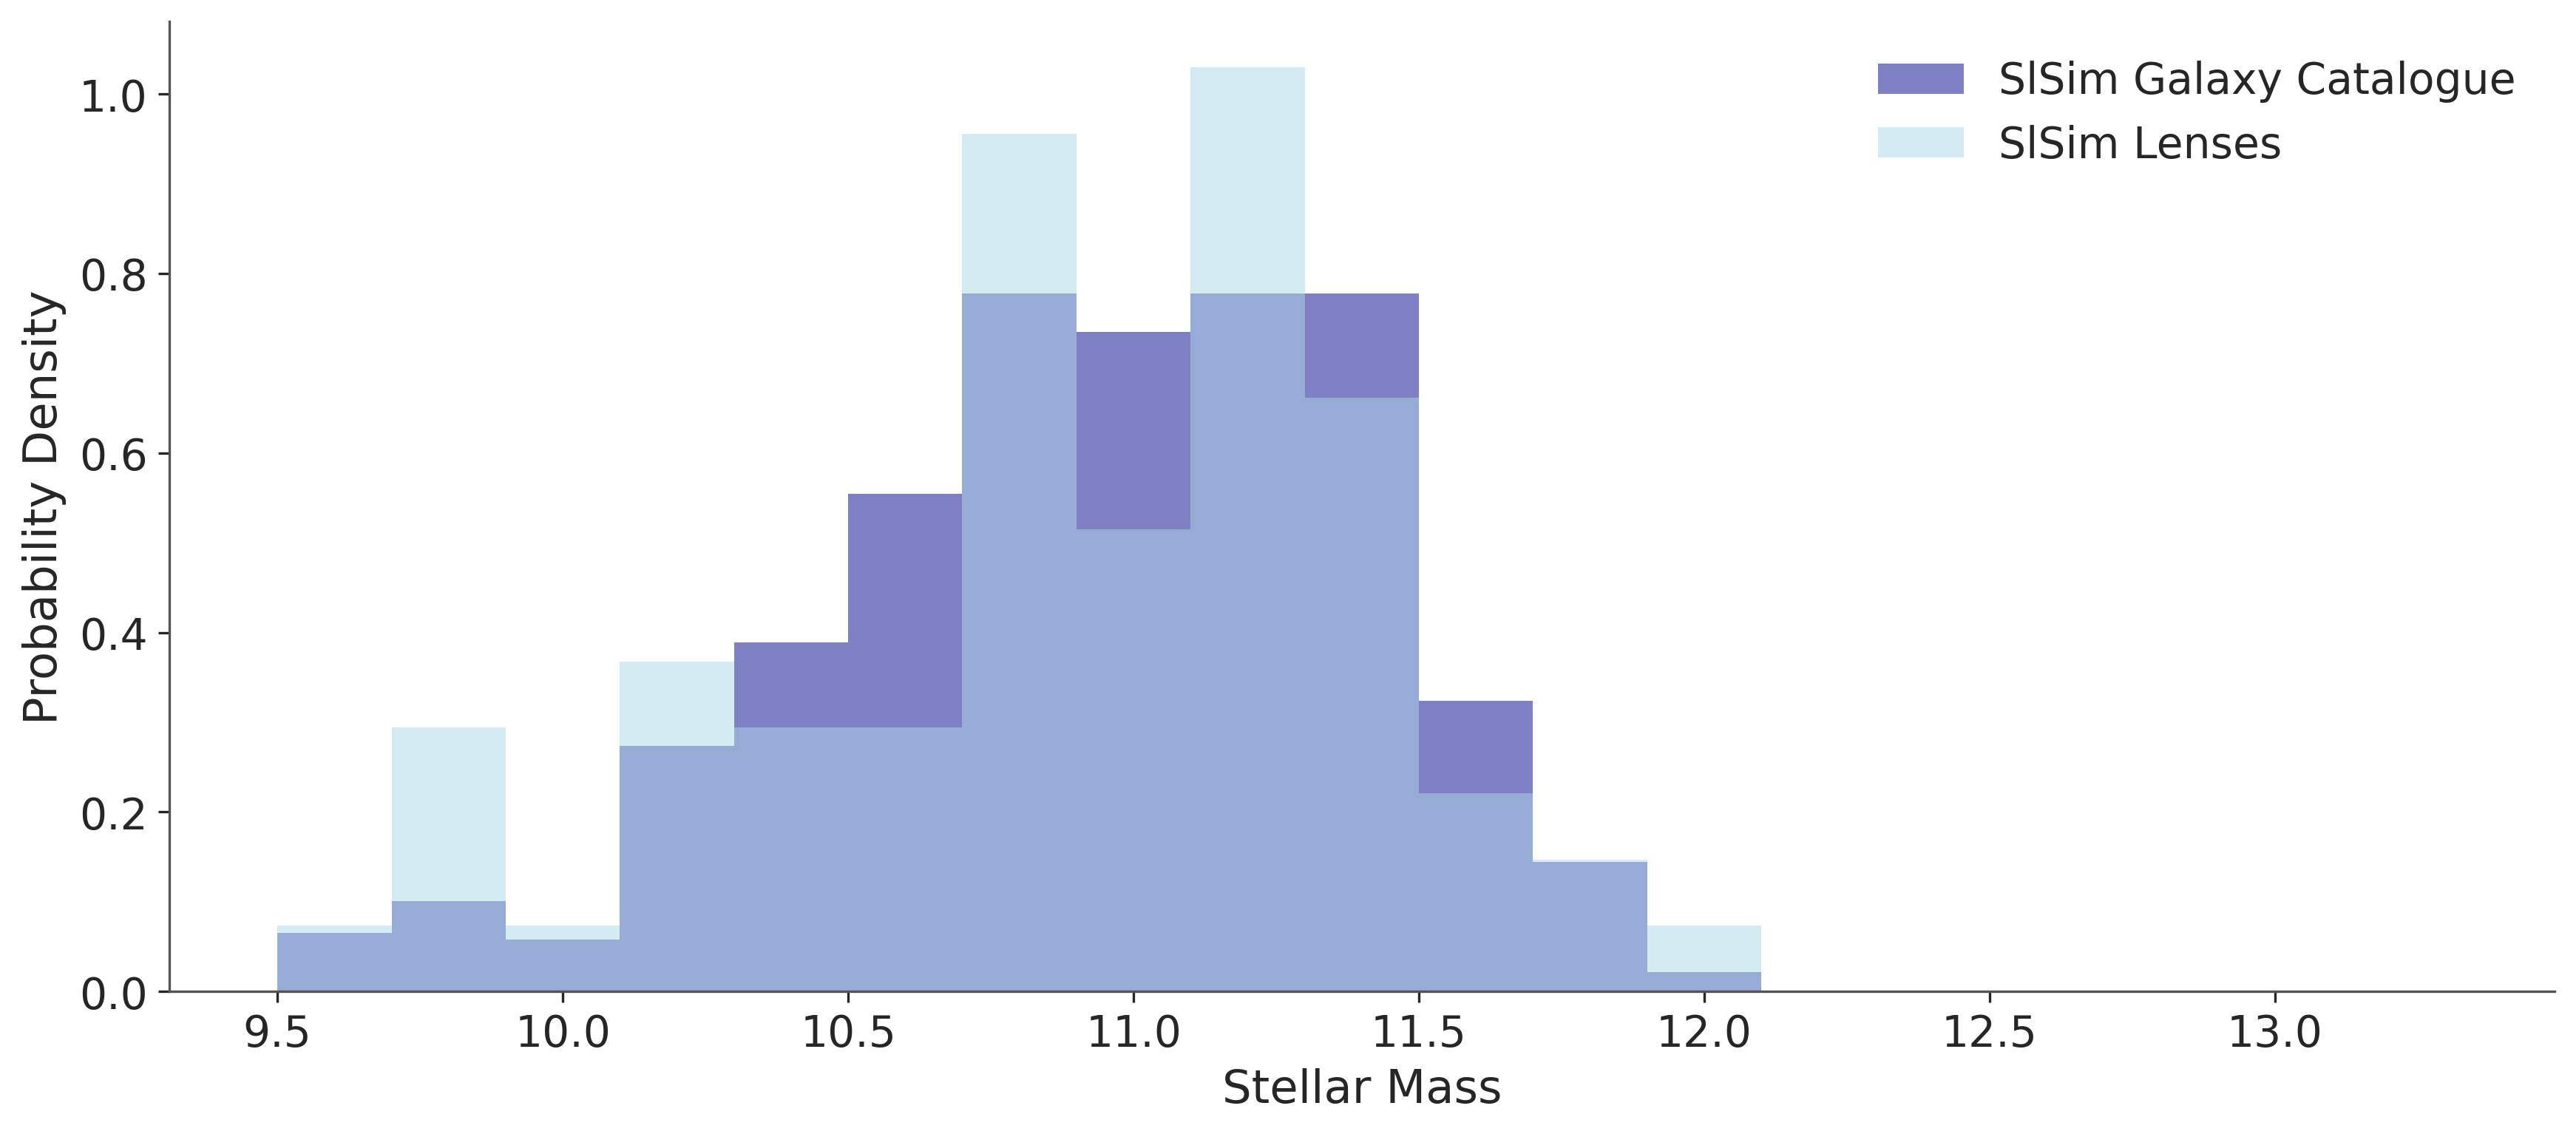

In [30]:
hist_dict = {'bins':np.arange(15,30,1),'alpha':0.5,'density':True}

pl.hist(lens_galaxies._galaxy_select['mag_i'],**hist_dict,label='SlSim Galaxy Catalogue',color='darkblue')
pl.hist([elem.deflector_magnitude('i') for elem in gg_lens_population],**hist_dict,label='SlSim Lenses',color='lightblue')
pl.hist(db_LensPop_LSST['i_lens'],**hist_dict,edgecolor='k',fill=False,label='LensPop Lenses')
pl.xlabel('$i$-band magnitude',fontsize=15)
pl.ylabel('Probability Density',fontsize=15)
pl.legend()
pl.show()

hist_dict = {'bins':np.arange(100,350,10),'alpha':0.5,'density':True}

pl.hist(lens_galaxies._galaxy_select['vel_disp'],**hist_dict,label='SlSim Galaxy Catalogue',color='darkblue')
pl.hist([elem.deflector_velocity_dispersion() for elem in gg_lens_population],**hist_dict,
        label='SlSim Lenses',color='lightblue')
pl.hist(vel_disp_from_m_star(np.array([elem.deflector_stellar_mass() for elem in gg_lens_population])),
        **hist_dict,label='SLSim Lenses (From M*)',color='darkorange')
pl.hist(db_LensPop_LSST['sig_v'],**hist_dict,edgecolor='k',fill=False,label='LensPop Lenses')
pl.xlabel('$\sigma$ km/s',fontsize=15)
pl.ylabel('Probability Density',fontsize=15)
pl.legend()
pl.show()

hist_dict = {'bins':np.arange(9.5,13.5,0.2),'alpha':0.5,'density':True}

pl.hist(np.log10(lens_galaxies._galaxy_select['stellar_mass']),**hist_dict,
        label='SlSim Galaxy Catalogue',color='darkblue')
pl.hist(np.log10([elem.deflector_stellar_mass() for elem in gg_lens_population]),**hist_dict,
        label='SlSim Lenses',color='lightblue')
pl.xlabel('Stellar Mass',fontsize=15)
pl.ylabel('Probability Density',fontsize=15)
pl.legend()
pl.show()



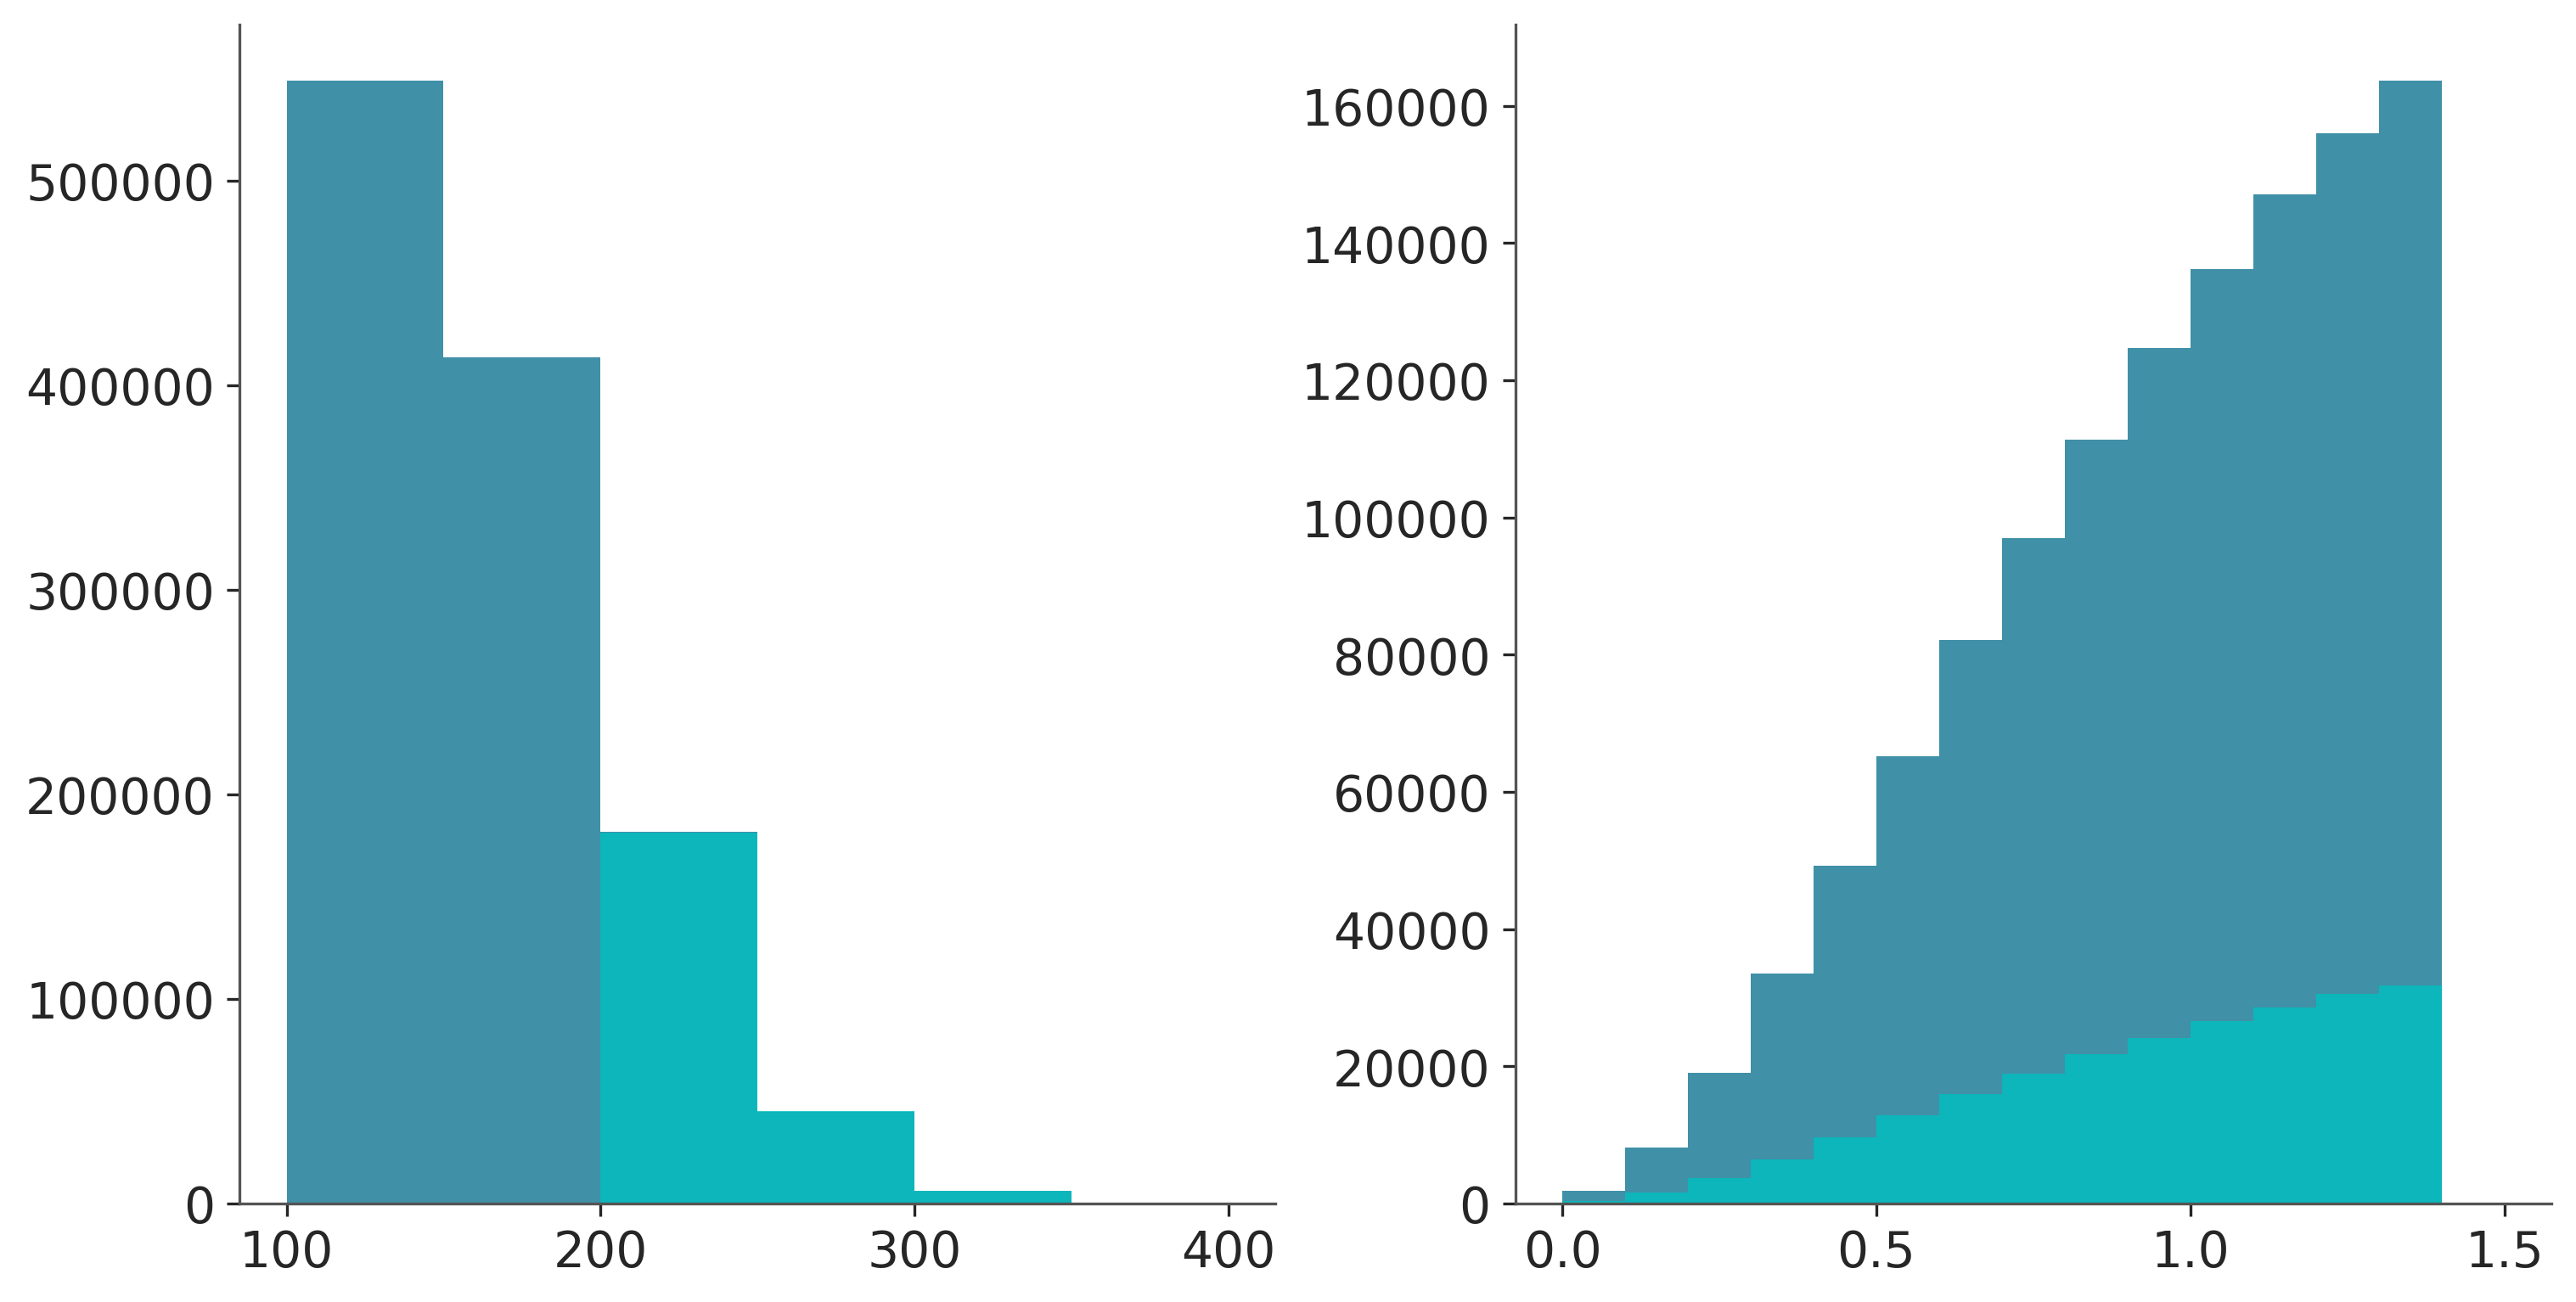

In [290]:

phi_star = 8.0 * 10 ** (-3) / cosmo.h**3
vd_star = 161
alpha = 2.32
beta = 2.67
z_100,v_100 = schechter_vel_disp(
    np.arange(0,1.5,0.1).tolist(),
    phi_star,
    alpha,
    beta,
    vd_star,
    vd_min=100,
    vd_max=500,
    sky_area=sky_area,
    cosmology=cosmo,
    noise=False)
z_200,v_200 = schechter_vel_disp(
    np.arange(0,1.5,0.1).tolist(),
    phi_star,
    alpha,
    beta,
    vd_star,
    vd_min=200,
    vd_max=500,
    sky_area=sky_area,
    cosmology=cosmo,
    noise=False)
fig,ax = pl.subplots(1,2,figsize=(10,5))
ax[0].hist(v_100,bins=np.arange(100,450,50),alpha=0.8)
ax[0].hist(v_200,bins=np.arange(100,450,50),alpha=0.8)
ax[1].hist(z_100,bins=np.arange(0,1.6,0.1),alpha=0.8)
ax[1].hist(z_200,bins=np.arange(0,1.6,0.1),alpha=0.8)
pl.show()

In [285]:
phi_star = 8.0 * 10 ** (-3) / cosmo.h**3
vd_star = 161
alpha = 2.32
beta = 2.67
np.random.seed(1)
z_range = np.arange(0,1.5,0.1)
z_200_500 = schechter_vel_disp_redshift(
    z_range,phi_star,alpha,beta,vd_star,
    vd_min=200,vd_max=500,
    sky_area=sky_area,cosmology=cosmo,noise=False)
z_100_500 = schechter_vel_disp_redshift(
    z_range,phi_star,alpha,beta,vd_star,
    vd_min=100,vd_max=500,
    sky_area=sky_area,cosmology=cosmo,noise=False)

v_200_500 = schechter_velocity_dispersion_function(
    alpha, beta, vd_star, vd_min=200, vd_max=500, size=len(z_200_500))
v_100_500 = schechter_velocity_dispersion_function(
    alpha, beta, vd_star, vd_min=100, vd_max=500, size=len(z_100_500))

print(sum(v_200_500>200),sum(v_100_500>200))
#=232757 232459

232757 232459


100%|██████████| 100/100 [00:00<00:00, 121.83it/s]


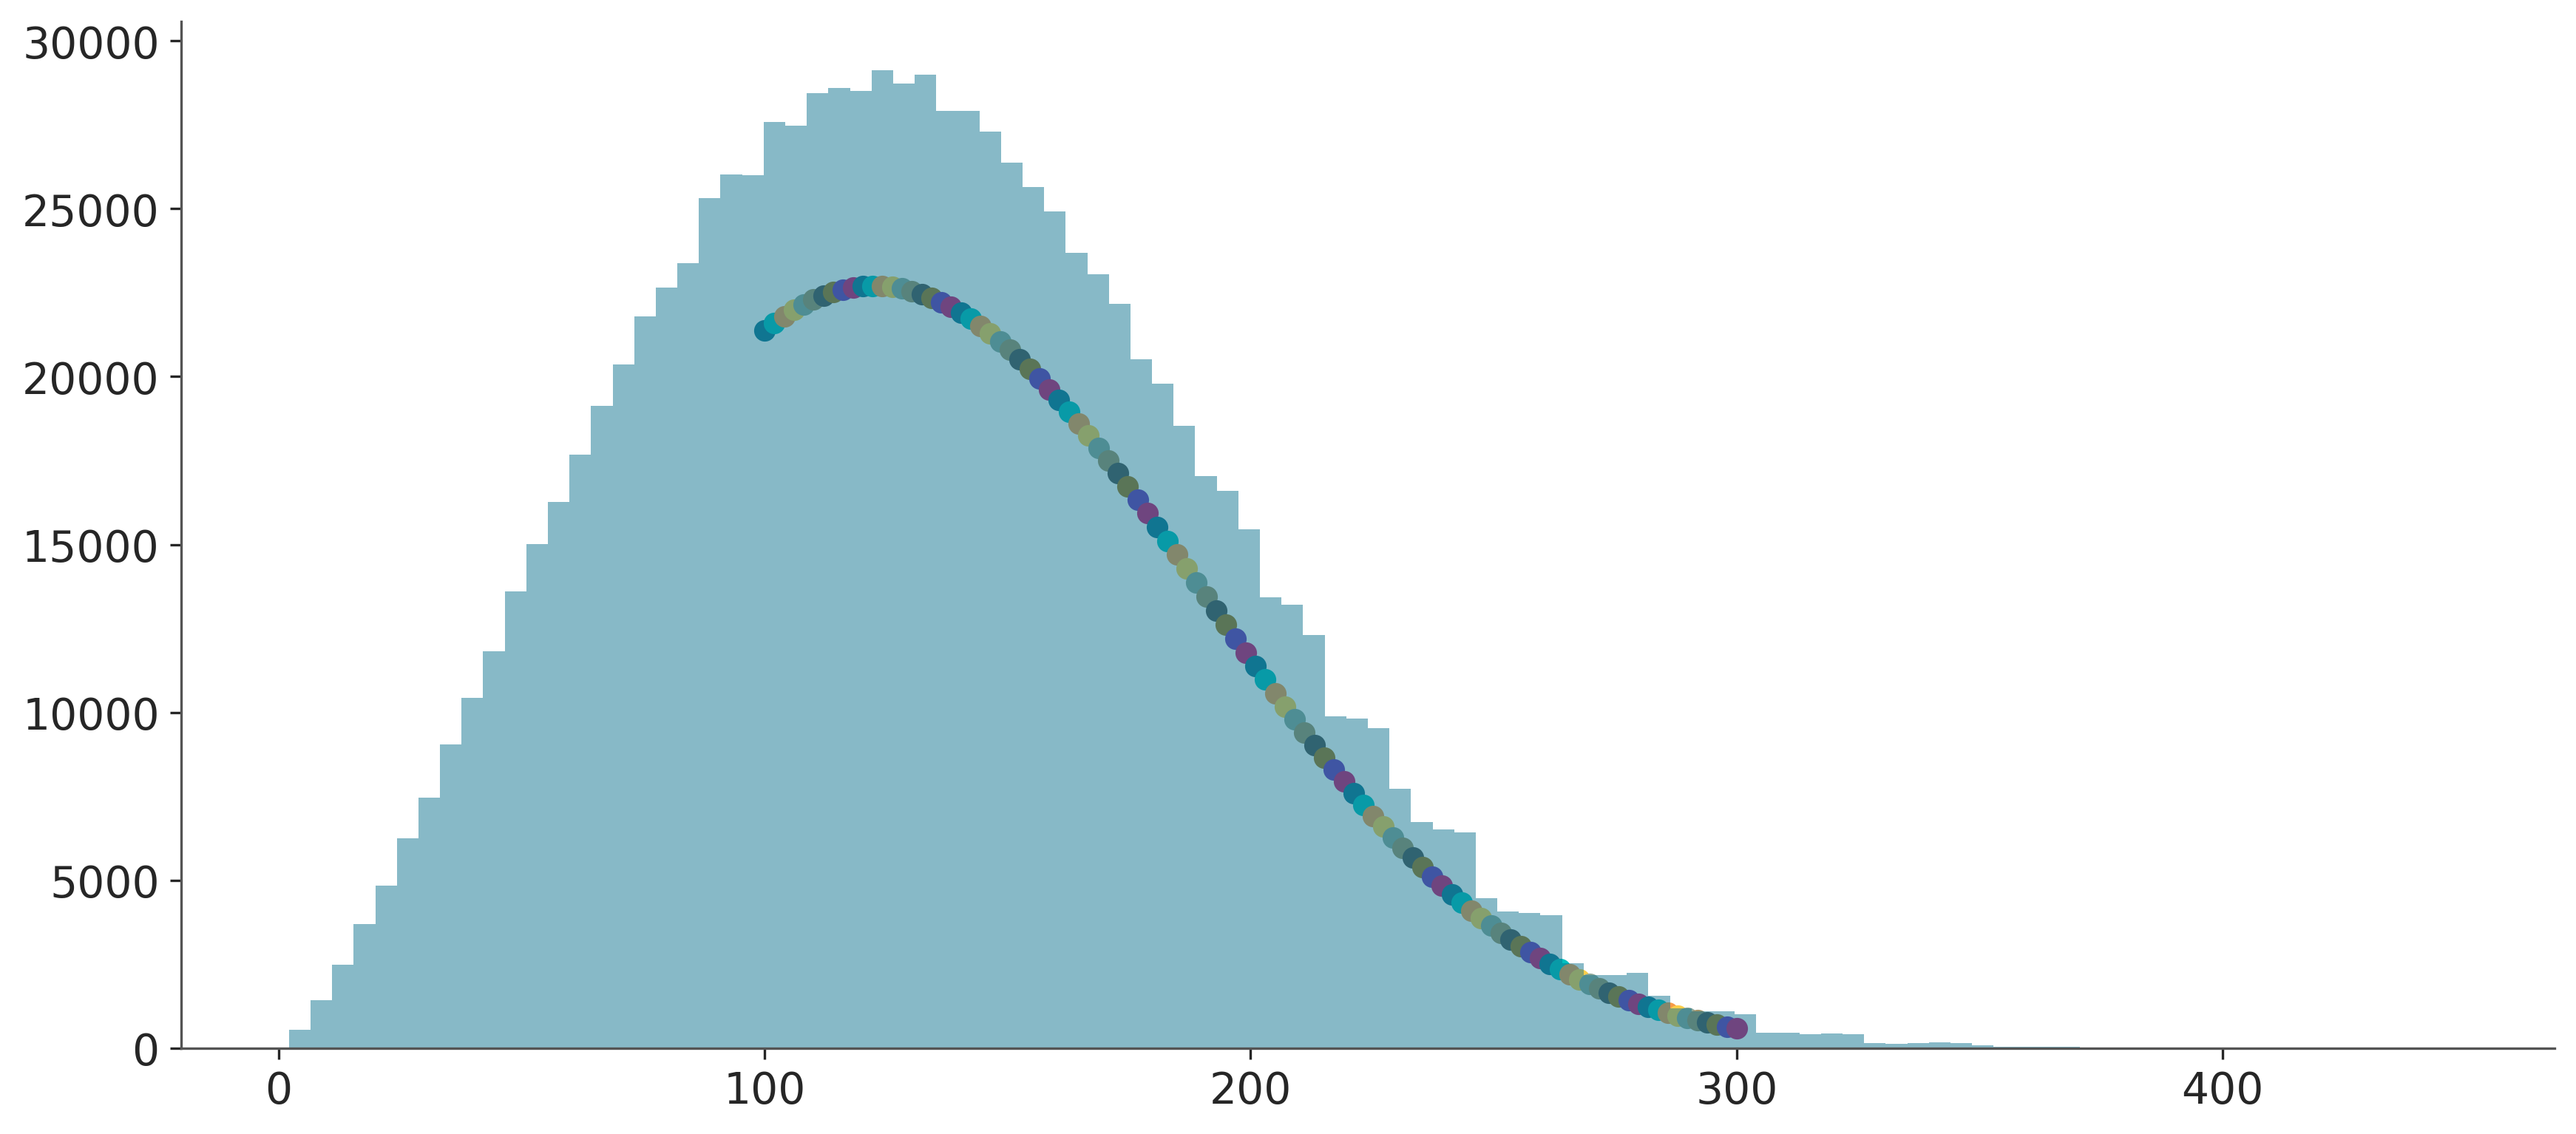

In [291]:
vd_min_list = np.linspace(100,300,100)
d_vd_min = vd_min_list[1]-vd_min_list[0]
for vd_min_i in tqdm(vd_min_list): 
    pl.scatter(vd_min_i,len(schechter_vel_disp_redshift(
    z_range,phi_star,alpha,beta,vd_star,
    vd_min=vd_min_i,vd_max=vd_min_i+d_vd_min,
    sky_area=sky_area,cosmology=cosmo,noise=False)))
alpha_prime = (alpha/beta) -1
xmin=0.00001;xmax=1000
pl.hist(vd_star*(schechter(alpha_prime,xmin,xmax,size=1000000)**(1/beta)),density=False,bins=100,alpha=0.5)

pl.show()

In [ ]:
fig,ax = pl.subplots(1,2,figsize=(10,5))

ax[0].hist(z_200_500,alpha=0.5,label='200-500',bins=np.arange(0,1.6,0.1))
ax[0].hist(z_100_500,alpha=0.5,label='100-500',bins=np.arange(0,1.6,0.1),fill=False,edgecolor='k')
ax[0].legend(fontsize=12)
ax[0].set_yscale('log')
ax[0].set_xlabel('z',fontsize=15)
ax[0].set_ylabel('Counts',fontsize=15)
ax[1].hist(v_200_500,alpha=0.5,label='200-500',bins=np.arange(100,600,50))
ax[1].hist(v_100_500,alpha=0.5,label='100-500',bins=np.arange(100,600,50),fill=False,edgecolor='k')
ax[1].legend(fontsize=12)
ax[1].set_yscale('log')
ax[1].set_xlabel('$\sigma$ km/s',fontsize=15)
ax[1].set_ylabel('Counts',fontsize=15)
pl.tight_layout()
pl.show()

In [277]:
def schechter_integral(
    redshift,
    phi_star,
    alpha,
    beta,
    vd_star,
    vd_min,
    vd_max,
    sky_area,
    cosmology,
    noise=True,
):

    alpha_prime = (alpha / beta) - 1
    x_min, x_max = (vd_min / vd_star) ** beta, (vd_max / vd_star) ** beta

    lnxmin = np.log(x_min)
    lnxmax = np.log(x_max)

    # gamma function integrand
    def f(lnx, a):
        return np.exp(lnx)*np.exp(a * lnx - np.exp(lnx)) if lnx < lnxmax.max() else 0.0

    # integrate gamma function for each redshift

    gamma_ab = scipy.special.gamma(alpha / beta)

    gam = np.empty_like(redshift)

    for i, _ in np.ndenumerate(gam):
        gam[i], _ = scipy.integrate.quad(f, lnxmin, lnxmax, args=(alpha_prime,))

    # comoving number density is normalisation times upper incomplete gamma
    density = phi_star * gam / gamma_ab
    return density

100%|██████████| 100/100 [00:00<00:00, 171.90it/s]


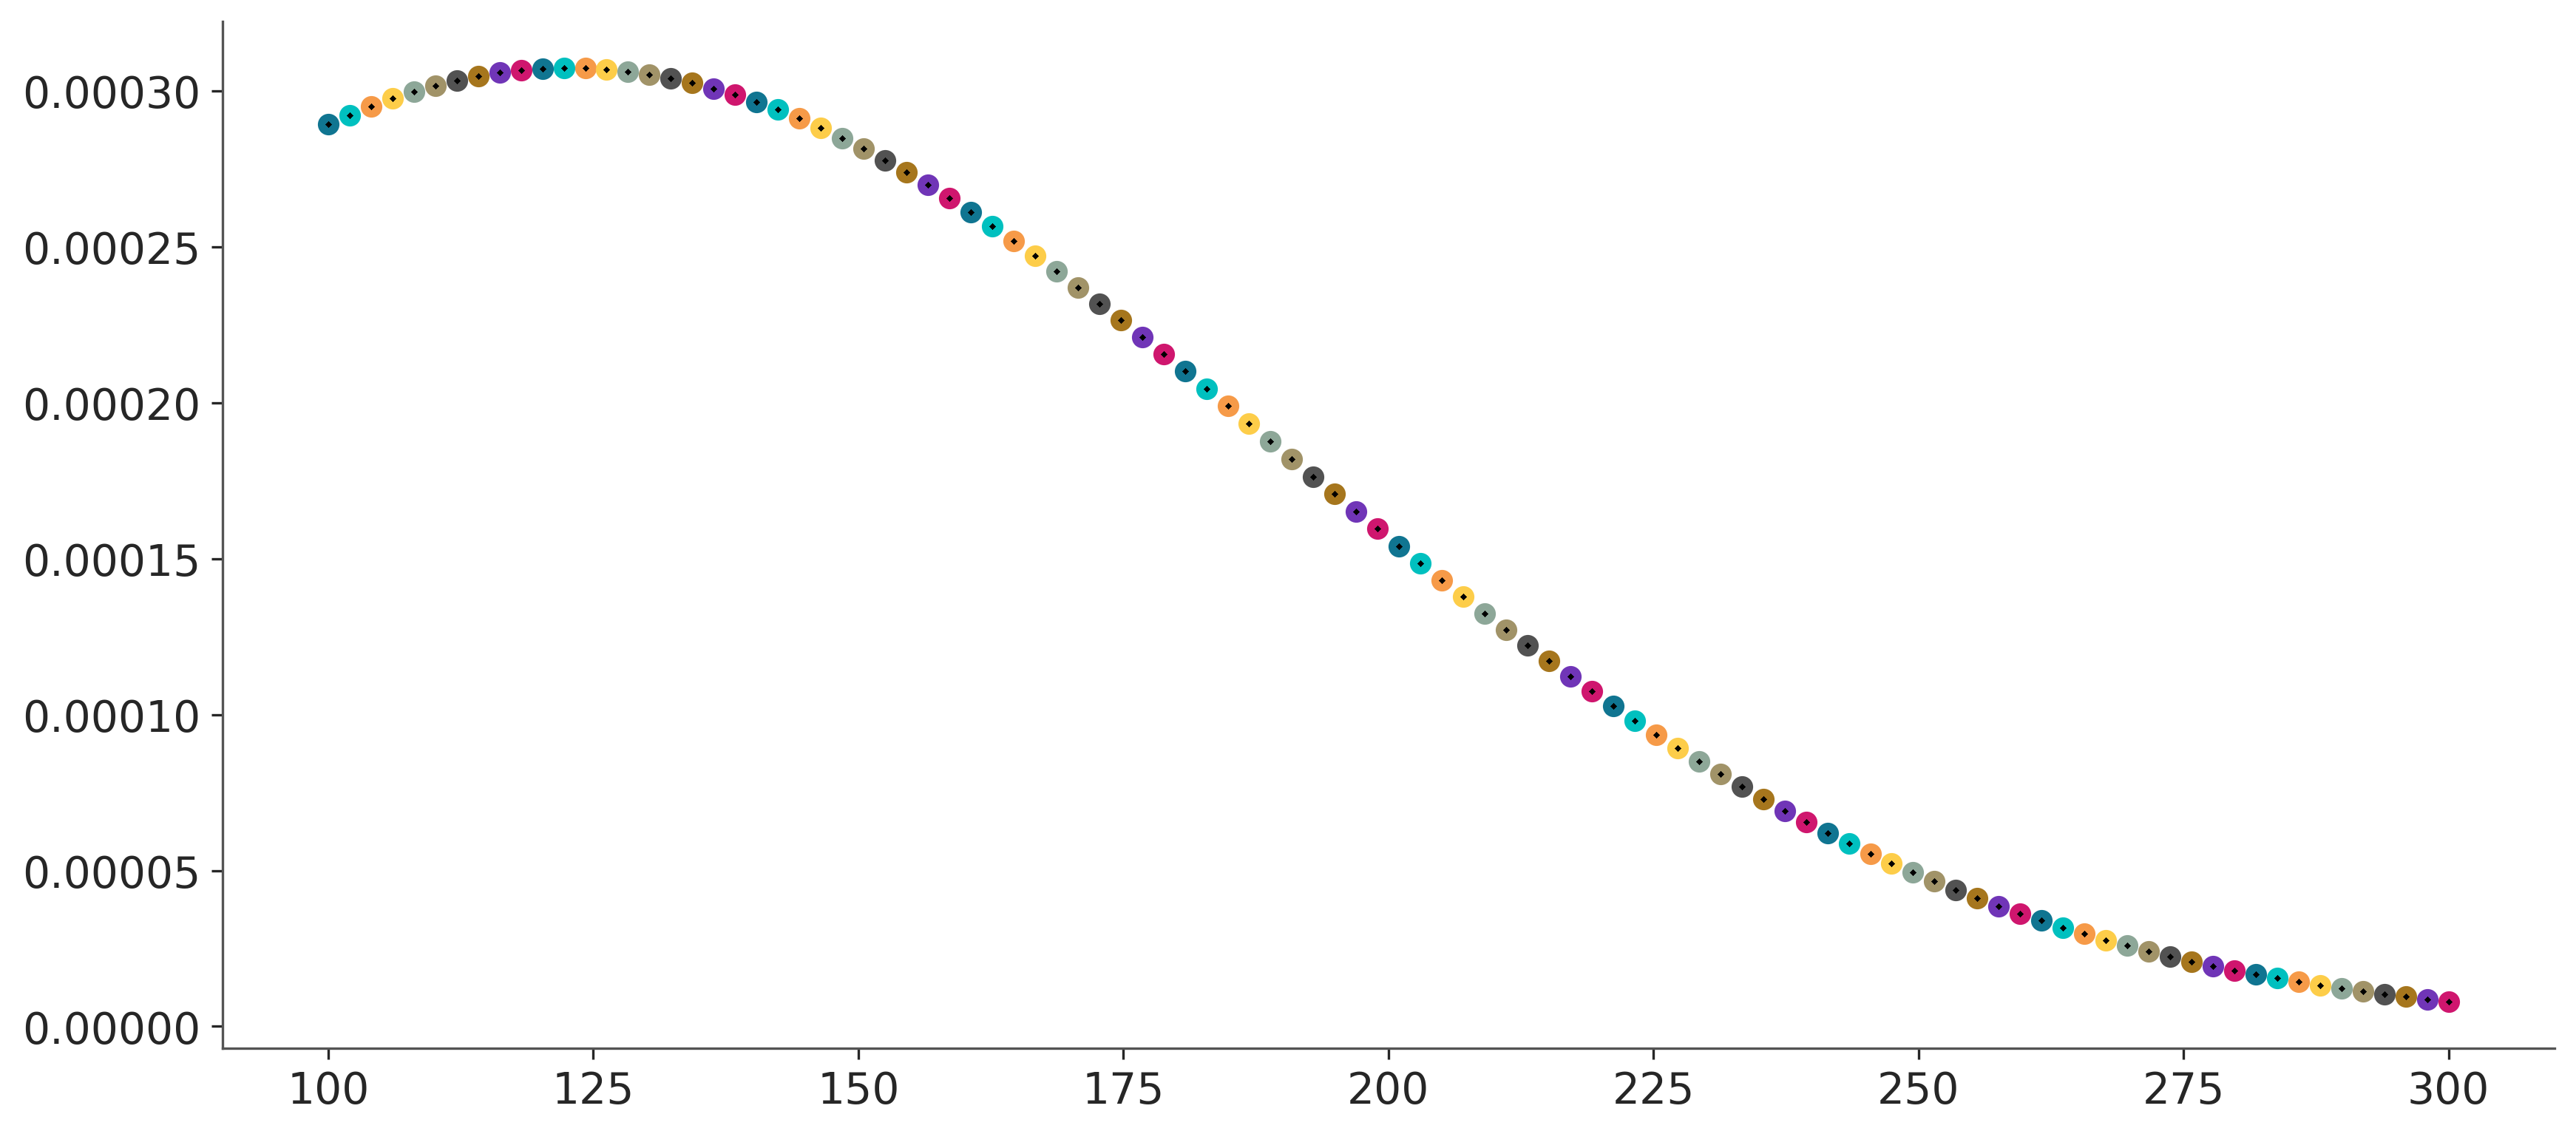

In [281]:
for vd_min_i in tqdm(vd_min_list):
    pl.scatter(vd_min_i,schechter_integral(0.5,phi_star,alpha,beta,vd_star,
    vd_min=vd_min_i,vd_max=vd_min_i+d_vd_min,
    sky_area=sky_area,cosmology=cosmo,noise=False))
    X_int = np.linspace(vd_min_i,vd_min_i+d_vd_min,100)
    pl.scatter(vd_min_i,quad(s_func,min(X_int),max(X_int))[0],marker='x',c='k',s=1)



In [270]:
from scipy.integrate import quad

def s_func(s):
    s_star=vd_star
    return phi_star*((s/s_star)**alpha)*np.exp(-(s/s_star)**beta)*(beta/scipy.special.gamma((alpha/beta)))*(1/s)

X_plot = np.linspace(vd_min_i,vd_min_i+d_vd_min,100)

Int_s_func = quad(s_func,min(X_plot),max(X_plot))[0]
Int_s_func


8.008688387242774e-06